In [1]:
import pandas as pd
import numpy as np
# Importing and Exporting Data
df = pd.read_csv('motor_second.csv')
df

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0
...,...,...,...,...,...,...,...,...,...
194,Vario 125,2019,15998,Automatic,17841,Skuter,150.0,34.9,125.0
195,Genio,2015,8798,Automatic,21701,Skuter,150.0,48.7,110.0
196,Vario 125,2019,15498,Automatic,15751,Sport,150.0,34.9,125.0
197,Supra X 125,2016,8298,Manual,17499,Bebek,30.0,55.4,125.0


In [10]:
mean_harga = df['harga'].mean()
print(f"Rata-rata harga: {mean_harga}")

Rata-rata harga: 11385.015075376885


In [11]:
median_odometer = df['odometer'].median()
print(f"Median odometer: {median_odometer}")

Median odometer: 21119.0


In [12]:
median_konsumsiBBM = df['konsumsiBBM'].median()
print(f"Median konsumsi BBM: {median_konsumsiBBM}")


Median konsumsi BBM: 56.5


In [16]:
# Hitung kuartil pertama (Q1) untuk kolom 'harga'
q1_harga = df['harga'].quantile(0.25)
print("Q1 (harga): ", q1_harga)

# Hitung kuartil ketiga (Q3) untuk kolom 'harga'
q3_harga = df['harga'].quantile(0.75)
print("Q3 (harga): ", q3_harga)

# Hitung rentang interkuartil (IQR)
iqr_harga = q3_harga - q1_harga
print("IQR (harga): ", iqr_harga)


Q1 (harga):  7996.5
Q3 (harga):  14498.5
IQR (harga):  6502.0


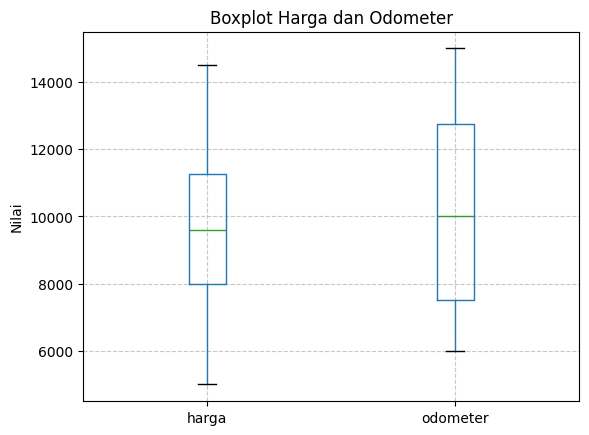

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame dengan data manual
data = {'model': ["Vario 125", "Revo", "PCX", "Genio"],  
        'harga': [14499, 5000, 10199, 9000],
        'odometer': [12000, 15000, 8000, 6000]}

df = pd.DataFrame(data)

# Membuat boxplot untuk kolom 'harga' dan 'odometer'
df[['harga', 'odometer']].boxplot()

# Menambahkan judul dan label
plt.title('Boxplot Harga dan Odometer')
plt.ylabel('Nilai')
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


In [3]:
outlier_data = {
    'model': ["Vario 125", "Revo", "PCX", "Genio"],  
    'harga': [51, 155, 45, 160],
    'odometer': [33, 320, 30, 355],
    'pajak': [2, 5, 2, 5]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017.0,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016.0,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016.0,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016.0,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015.0,10199,Automatic,33177,Skuter,160.0,51.4,150.0
...,...,...,...,...,...,...,...,...,...
198,Verza,2019.0,14998,Kopling,6717,Sport,150.0,44.1,150.0
199,Vario 125,NaN,51,NaN,33,NaN,2.0,NaN,NaN
200,Revo,NaN,155,NaN,320,NaN,5.0,NaN,NaN
201,PCX,NaN,45,NaN,30,NaN,2.0,NaN,NaN


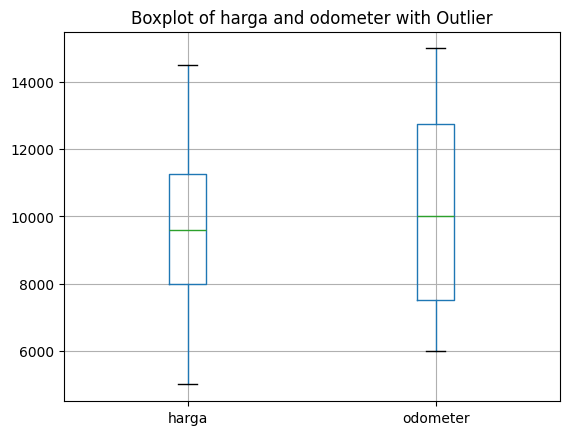

In [14]:
import matplotlib.pyplot as plt

# Membuat boxplot untuk kolom Harga dan Odometer
df.boxplot(column=['harga','odometer'])
plt.title('Boxplot of harga and odometer with Outlier')
plt.show()

In [5]:
# Hitung kuartil pertama (Q1) untuk kolom Odometer
q1 = df['odometer'].quantile(0.25)
print("Q1 : ", q1)

# Hitung kuartil ketiga (Q3)
q3 = df['odometer'].quantile(0.75)
print("Q3 : ", q3)

# Hitung Interquartile Range (IQR)
iqr = q3 - q1
print("IQR : ", iqr)

# Hitung batas bawah (Lower Bound) dan batas atas (Upper Bound) untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Temukan outlier dalam DataFrame
outliers = df[(df['odometer'] < lower_bound) | (df['odometer'] > upper_bound)]

print("outlier odometer:")
print(outliers)

Q1 :  12156.5
Q3 :  31916.5
IQR :  19760.0
outlier odometer:
   model   tahun  harga  transmisi  odometer   jenis  pajak  konsumsiBBM  \
94   PCX  2011.0   6936  Automatic     72436  Skuter  200.0         47.9   
96   PCX  2012.0   5000  Automatic    119050  Skuter  150.0         48.7   

    mesin  
94  150.0  
96  150.0  


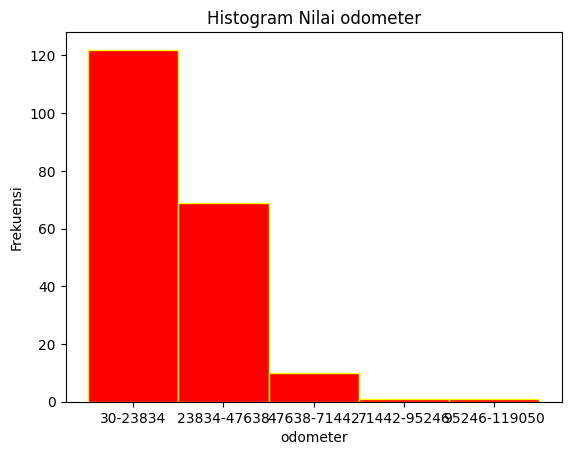

In [6]:
# Ambil data dari kolom Odometer
data_odometer = df["odometer"]

# Buat histogram
n, bins, patches = plt.hist(data_odometer, bins=5, color='red', edgecolor='yellow')

# Tambahkan Label
plt.title('Histogram Nilai odometer')
plt.xlabel('odometer')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [7]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik
outliers_condition = (
    (df['odometer'] > upper_bound) | (df['odometer'] < lower_bound) |
    (df['harga'] < 30) | (df['harga'] > 200)
)
# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

         model  tahun  harga transmisi  odometer jenis  pajak  konsumsiBBM  \
199  Vario 125    NaN     51       NaN        33   NaN    2.0          NaN   
200       Revo    NaN    155       NaN       320   NaN    5.0          NaN   
201        PCX    NaN     45       NaN        30   NaN    2.0          NaN   
202      Genio    NaN    160       NaN       355   NaN    5.0          NaN   

     mesin  
199    NaN  
200    NaN  
201    NaN  
202    NaN  


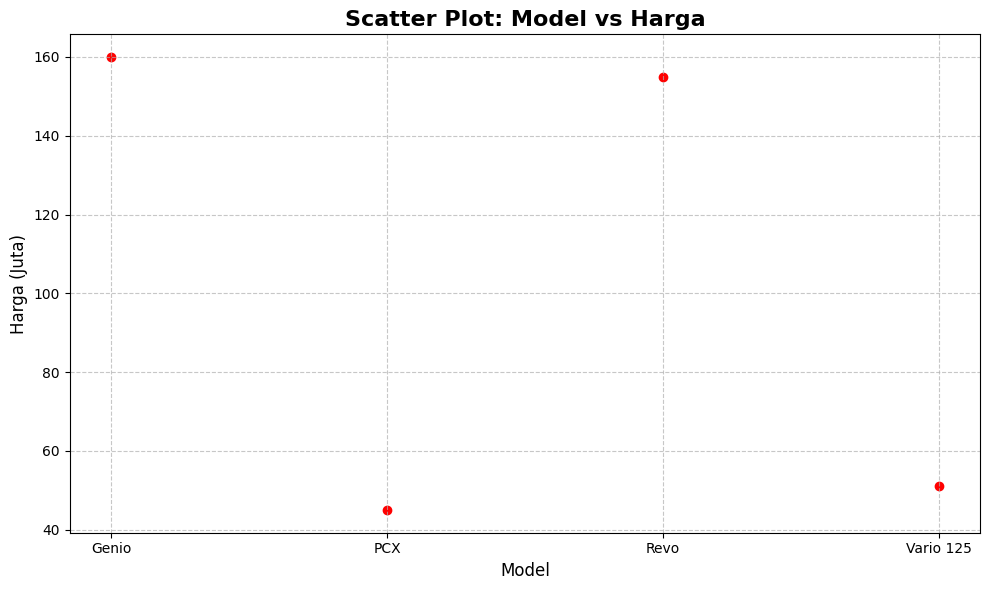

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh
data = {'model': ["Vario 125", "Revo", "PCX", "Genio"],  
        'harga': [51, 155, 45, 160]}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengubah kolom 'model' menjadi kategori dan menggunakan kode kategori
df['model_kode'] = pd.Categorical(df['model']).codes

# Membuat Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['model_kode'], df['harga'], color='red', marker='o')

# Mengubah labels di sumbu x agar sesuai dengan nama model
plt.xticks(df['model_kode'], df['model'])

# Menambahkan Label
plt.title('Scatter Plot: Model vs Harga', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Harga (Juta)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()



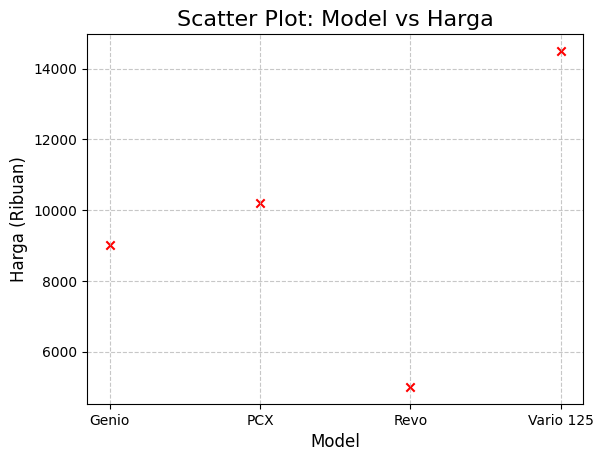

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Data contoh
data = {'model': ["Vario 125", "Revo", "PCX", "Genio"],  
        'harga': [14499, 5000, 10199, 9000]}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengubah kolom 'model' menjadi kategori dan menggunakan kode kategori
df['model_kode'] = pd.Categorical(df['model']).codes

# Membuat Scatter Plot
plt.scatter(df['model_kode'], df['harga'], color='red', marker='x')

# Mengubah labels di sumbu x agar sesuai dengan nama model
plt.xticks(df['model_kode'], df['model'])

# Menambahkan Label
plt.title('Scatter Plot: Model vs Harga', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Harga (Ribuan)', fontsize=12)

# Tampilkan plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
